In [ ]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 49kB/s 


In [ ]:
! pip install keras

In [ ]:
! pip install pandas

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
GPU is available


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_X = []
train_y = []
IMG_SIZE = 224
DIR1 = "/content/drive/My Drive/Colab Notebooks/Food and NotFood/training/"
train_data = os.listdir(DIR1)
train_data

['Non-Food', 'Food']

In [ ]:
for file in train_data:
    filename = os.path.join(DIR1, file)
    if file=='Non-Food':
      label=0
    else:
      label=1
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            train_X.append(np.array(img))
            train_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder Non-Food started
Folder Non-Food done
The folder Non-Food is labeled as 0
Folder Food started
Folder Food done
The folder Food is labeled as 1


In [ ]:
test_X = []
test_y = []
IMG_SIZE = 224
DIR2 = "/content/drive/My Drive/Colab Notebooks/Food and NotFood/validation/"
test_data = os.listdir(DIR2)
test_data

['Food', 'Non-Food']

In [ ]:
for file in test_data:
    filename = os.path.join(DIR2, file)
    if file=='Non-Food':
      label=0
    else:
      label=1
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            test_X.append(np.array(img))
            test_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder Food started
Folder Food done
The folder Food is labeled as 1
Folder Non-Food started
Folder Non-Food done
The folder Non-Food is labeled as 0


In [ ]:
eval_X = []
eval_y = []
IMG_SIZE = 224
DIR3 = "/content/drive/My Drive/Colab Notebooks/Food and NotFood/evaluation/"
eval_data = os.listdir(DIR3)
eval_data

['Food', 'Non-Food']

In [ ]:
for file in eval_data:
    filename = os.path.join(DIR3, file)
    if file=='Non-Food':
      label=0
    else:
      label=1
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            eval_X.append(np.array(img))
            eval_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder Food started
Folder Food done
The folder Food is labeled as 1
Folder Non-Food started
Folder Non-Food done
The folder Non-Food is labeled as 0


[884, 360, 1595, 1895, 1893, 1030, 1874, 2033, 1719, 2684]


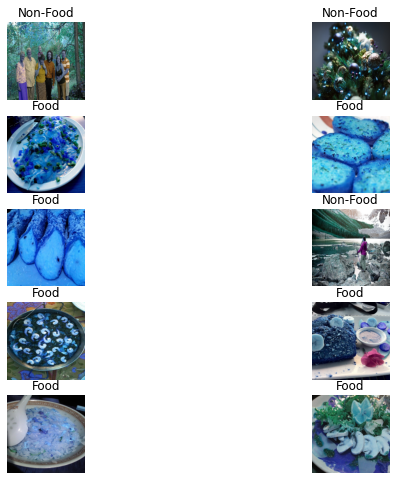

In [ ]:
import random
from random import sample
plt.figure(figsize=(10,10))
random_indexes = sample(range(1, 3000), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(6,2, i + 1)
  sp.set_title(train_data[train_y[img_index]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(train_X[img_index])


In [ ]:
random_state = 100
train_X, train_y = shuffle(train_X, train_y, random_state = random_state)
test_X, test_y = shuffle(test_X, test_y, random_state = random_state)
eval_X, eval_y = shuffle(eval_X, eval_y, random_state = random_state)


In [ ]:
train_X = np.array(train_X)
train_y = np.array(train_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

eval_X = np.array(eval_X)
eval_y = np.array(eval_y)

print("train_X shape is {}".format(train_X.shape))
print("train_y shape is {}".format(train_y.shape))

print('\n')

print("test_X shape is {}".format(test_X.shape))
print("test_y shape is {}".format(test_y.shape))

print('\n')

print("eval_X shape is {}".format(eval_X.shape))
print("eval_y shape is {}".format(eval_y.shape))

train_X shape is (3000, 224, 224, 3)
train_y shape is (3000,)


test_X shape is (1000, 224, 224, 3)
test_y shape is (1000,)


eval_X shape is (1004, 224, 224, 3)
eval_y shape is (1004,)


In [ ]:
from tensorflow.keras.utils import to_categorical

print("Before the categorical the shape of train_y is {}".format(train_y.shape))
train_y = to_categorical(train_y)
print("After the categorical the shape of train_y is {}".format(train_y.shape))

print('\n')

print("Before the categorical the shape of test_y is {}".format(test_y.shape))
test_y = to_categorical(test_y)
print("After the categorical the shape of test_y is {}".format(test_y.shape))

print('\n')

print("Before the categorical the shape of eval_y is {}".format(eval_y.shape))
eval_y = to_categorical(eval_y)
print("After the categorical the shape of eval_y is {}".format(eval_y.shape))


Before the categorical the shape of train_y is (3000,)
After the categorical the shape of train_y is (3000, 2)


Before the categorical the shape of test_y is (1000,)
After the categorical the shape of test_y is (1000, 2)


Before the categorical the shape of eval_y is (1004,)
After the categorical the shape of eval_y is (1004, 2)


In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
      rescale = 1./255)

evaluation_datagen = ImageDataGenerator(
      rescale = 1./255)

In [ ]:
training_set=training_datagen.flow(train_X,train_y)
test_set=validation_datagen.flow(test_X,test_y)
eval_set=evaluation_datagen.flow(eval_X,eval_y)

In [ ]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3",
# Here we will be using imagenet weights\n"
IMAGE_SIZE=[224,224]
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights\n",
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/Colab Notebooks/Food and NotFood/training/*')
len(folders)

2

In [ ]:
x = Flatten()(vgg.output)

In [ ]:

prediction=Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
batch_size=32
r= model.fit_generator(training_set,epochs = 10, validation_data = test_set,verbose = 1, steps_per_epoch=train_X.shape[0] // batch_size,validation_steps=test_X.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
93/93 [==============================] - 41s 443ms/step - loss: 0.4358 - accuracy: 0.8450 - val_loss: 0.1298 - val_accuracy: 0.9506
Epoch 2/10
93/93 [==============================] - 40s 431ms/step - loss: 0.1882 - accuracy: 0.9235 - val_loss: 0.1115 - val_accuracy: 0.9546
Epoch 3/10
93/93 [==============================] - 40s 426ms/step - loss: 0.1519 - accuracy: 0.9377 - val_loss: 0.1474 - val_accuracy: 0.9516
Epoch 4/10
93/93 [==============================] - 39s 424ms/step - loss: 0.1637 - accuracy: 0.9326 - val_loss: 0.1043 - val_accuracy: 0.9607
Epoch 5/10
93/93 [==============================] - 39s 421ms/step - loss: 0.1336 - accuracy: 0.9471 - val_loss: 0.0992 - val_accuracy: 0.9597
Epoch 6/10
93/93 [==============================] - 39s 421ms/step - loss: 0.1344 - accuracy: 0.9495 - val_loss: 0.1034 - val_accuracy: 0.9607
Epoch 7/10
93/93 [==============================] - 39s 422ms/step

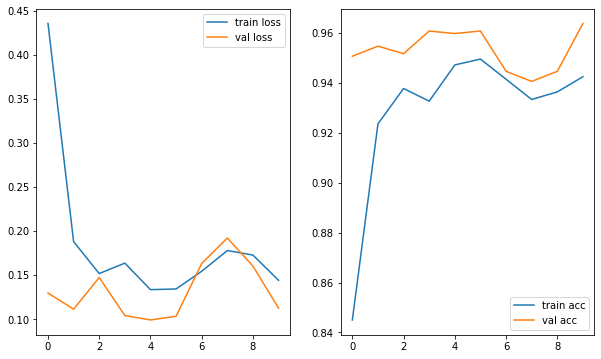

In [ ]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [ ]:
k=r.history['val_accuracy']
print('The Validation Accuracy of VGG19 Model: ', np.mean(k))

The Validation Accuracy of VGG19 Model:  0.9531250059604645


In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('Food_model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_X)
y_pred_digits = np.argmax(y_pred, axis=1)
y_pred_digits

y_pred_labels = np.unique(y_pred_digits, return_counts=True)
y_pred_labels


(array([0, 1]), array([517, 483]))

In [ ]:
real_labels= np.argmax(test_y, axis=1)
real_labels
real_labels1 = np.unique(real_labels, return_counts=True)
real_labels1

(array([0, 1]), array([500, 500]))

In [ ]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(real_labels, y_pred_digits)
c_m

array([[487,  13],
       [ 30, 470]])

Text(33.0, 0.5, 'Actual')

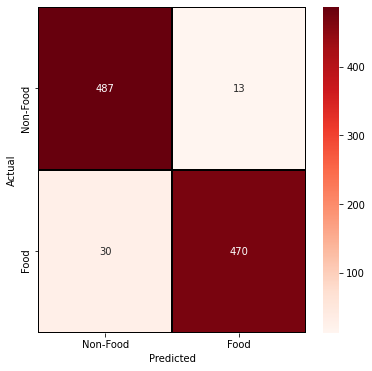

In [ ]:

import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = train_data , yticklabels = train_data)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(real_labels, y_pred_digits)
acc_score

0.957

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(real_labels)):
    if(real_labels[i] == y_pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==10):
        break
i=0
for i in range(len(real_labels)):
    if(real_labels[i] != y_pred_digits[i]):
        mis_class.append(i)


In [ ]:
print(len(mis_class))

43


[5, 8, 4, 2, 0, 1, 7, 6, 3, 9]


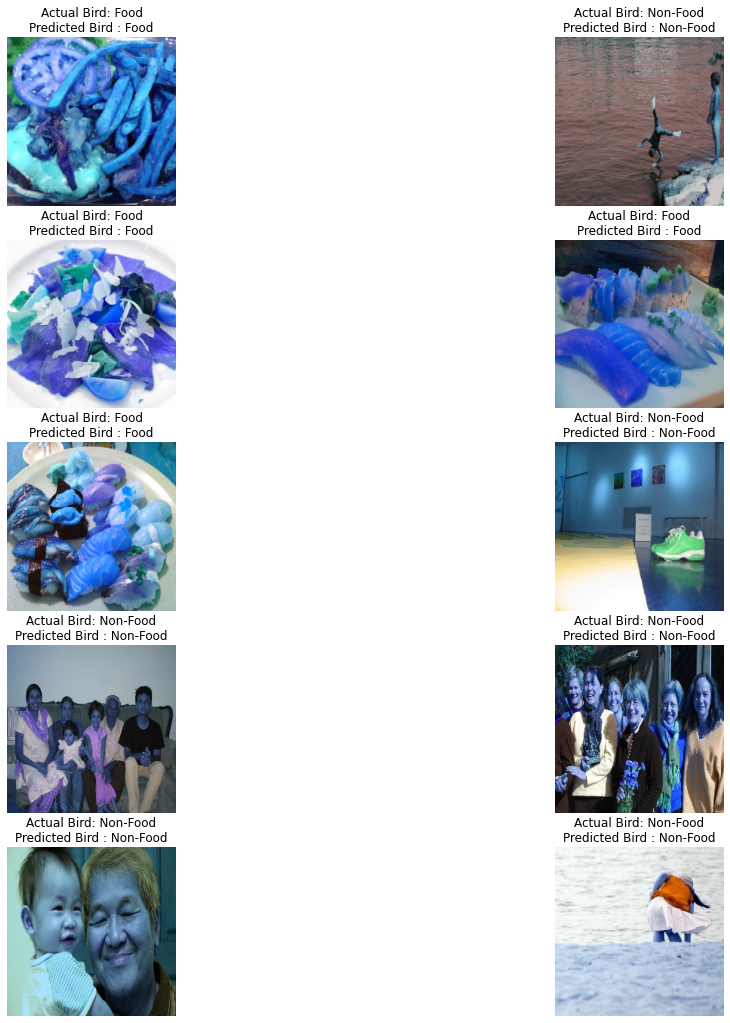

In [ ]:
labels_names={0:'Non-Food', 
        1:'Food'
        }
#fig.set_size_inches(8,8)
import random
from random import sample
plt.figure(figsize=(18,18))
random_indexes = sample(range(0, 10), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual Bird: '+ labels_names[real_labels[prop_class[img_index]]]+ '\n' + 'Predicted Bird : ' + labels_names[y_pred_digits[prop_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(test_X[prop_class[img_index]])

[4, 3, 5, 8, 7, 1, 2, 6, 9, 0]


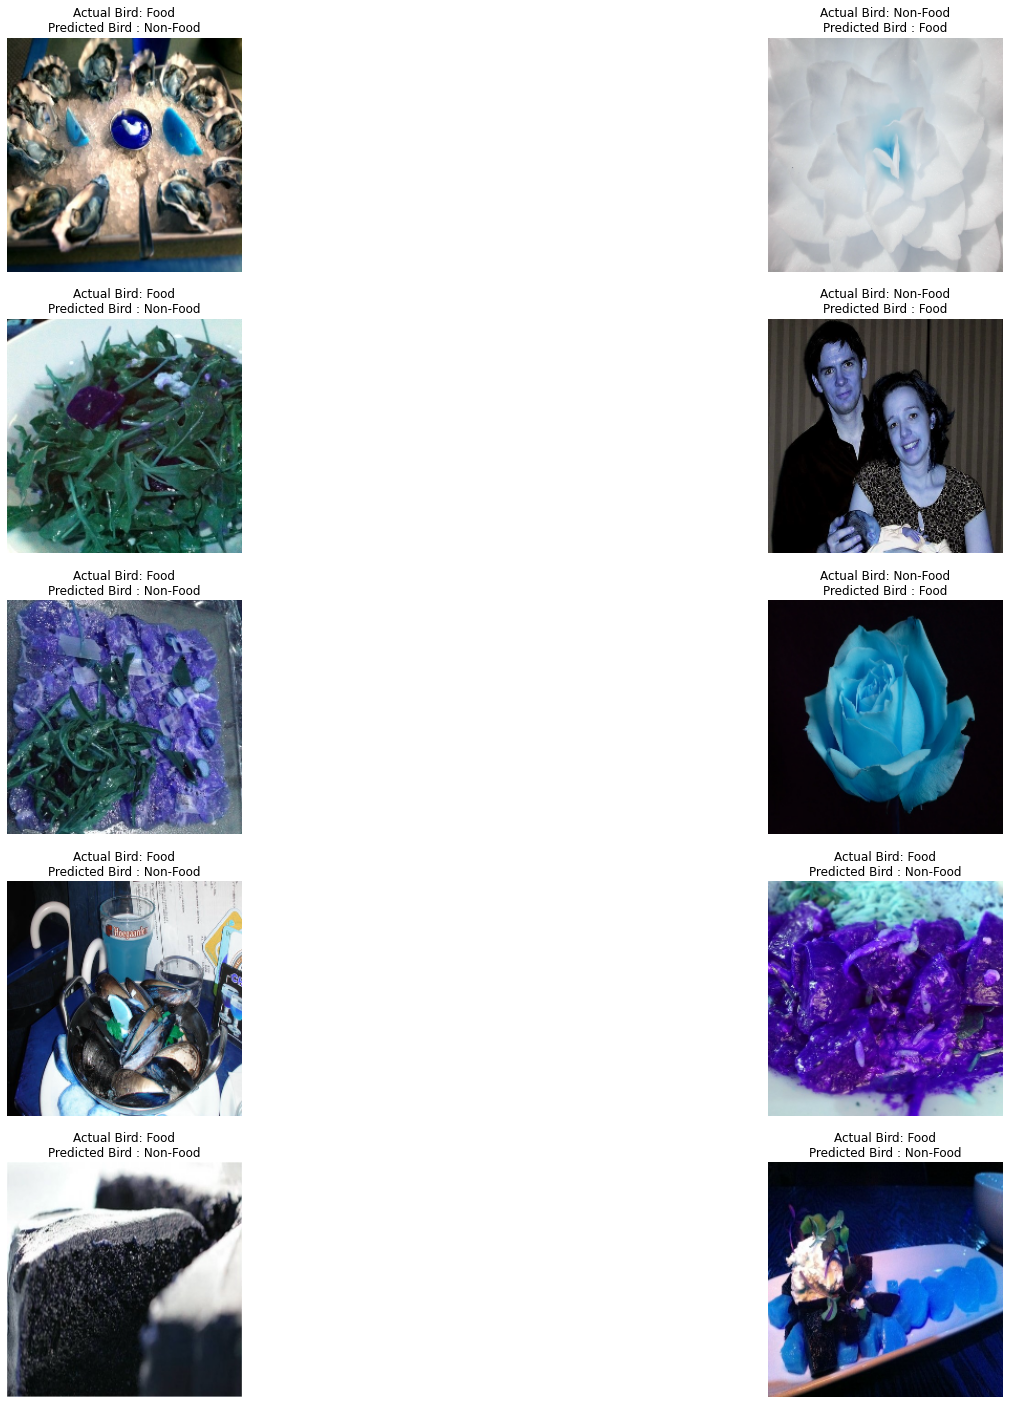

In [ ]:
labels_names={0:'Non-Food', 
        1:'Food'
        }
import random
from random import sample

random_indexes = sample(range(0, 10), 10)
print(random_indexes)
plt.figure(figsize=(25,25))
for i, img_index in enumerate(random_indexes):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual Bird: '+ labels_names[real_labels[mis_class[img_index]]]+ '\n' + 'Predicted Bird : ' + labels_names[y_pred_digits[mis_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(test_X[mis_class[img_index]])

In [ ]:
# Evaluate The Model with Different Images

In [148]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [149]:
model=load_model('Food_model_vgg19.h5')

In [ ]:
eval_y_pred = model.predict(eval_X)
eval_y_pred_digits = np.argmax(eval_y_pred, axis=1)
eval_y_pred_digits

eval_y_pred_labels = np.unique(eval_y_pred_digits, return_counts=True)
eval_y_pred_labels

(array([0, 1]), array([538, 466]))

In [ ]:
eval_real_labels= np.argmax(eval_y, axis=1)
eval_real_labels

eval_real_labels1 = np.unique(eval_real_labels, return_counts=True)
eval_real_labels1

(array([0, 1]), array([500, 504]))

In [ ]:
from sklearn.metrics import confusion_matrix
c_m1 = confusion_matrix(eval_real_labels, eval_y_pred_digits)
c_m1

array([[493,   7],
       [ 45, 459]])

Text(33.0, 0.5, 'Actual')

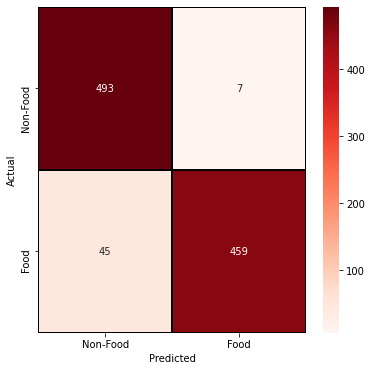

In [ ]:
labelss=['Non-Food', 'Food']
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m1,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labelss , yticklabels = labelss)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
results = model.evaluate(eval_X, eval_y, batch_size=32)
print("test loss, test acc:", results)



32/32 [==============================] - 5s 146ms/step - loss: 8.7678 - accuracy: 0.9482
test loss, test acc: [8.767794609069824, 0.9482071995735168]


In [150]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/noodles.jpg',target_size=(224,224))

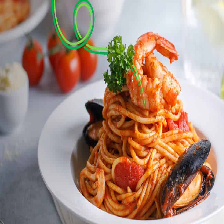

In [151]:
img


In [152]:
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
imgy=preprocess_input(y)
imgy=imgy/255

In [153]:
preds= model.predict(imgy)
preds

array([[4.0422776e-08, 1.0000000e+00]], dtype=float32)

In [154]:
a=np.argmax(preds, axis=1)
a

array([1])

In [155]:
if(a==0):
    print("Non-Food")
else:
    print("Food")

Food
